In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [76]:
# Read file CSV
df = pd.read_csv('/content/drive/MyDrive/Portofolio/Random Forest Music Genre Classification/MusicGenreDataset.csv')

# show dataframe
#print(df)

In [77]:
# Specify the features to be removed
features_to_remove = ['filename']

# Remove the specified features from the dataframe
df = df.drop(features_to_remove, axis=1)

In [78]:
# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [79]:
# Apply MinMax scaling on the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Classification Report:
              precision    recall  f1-score   support

       blues       0.71      0.66      0.68       100
   classical       0.90      0.93      0.92       100
     country       0.53      0.57      0.55       100
       disco       0.50      0.51      0.51       100
      hiphop       0.54      0.55      0.55       100
        jazz       0.67      0.72      0.70       100
       metal       0.75      0.84      0.79       100
         pop       0.72      0.79      0.75       100
      reggae       0.60      0.56      0.58       100
        rock       0.44      0.32      0.37       100

    accuracy                           0.65      1000
   macro avg       0.64      0.65      0.64      1000
weighted avg       0.64      0.65      0.64      1000

Confusion Matrix:
[[66  1  6  2  1  6  7  0  4  7]
 [ 1 93  1  1  0  1  0  0  2  1]
 [ 6  2 57  4  2 13  0  3  4  9]
 [ 0  1  3 51 15  1  4 11  3 11]
 [ 0  0  3  9 55  0  8  8 11  6]
 [ 2  6 10  3  2 72  1  2  2  0]
 [

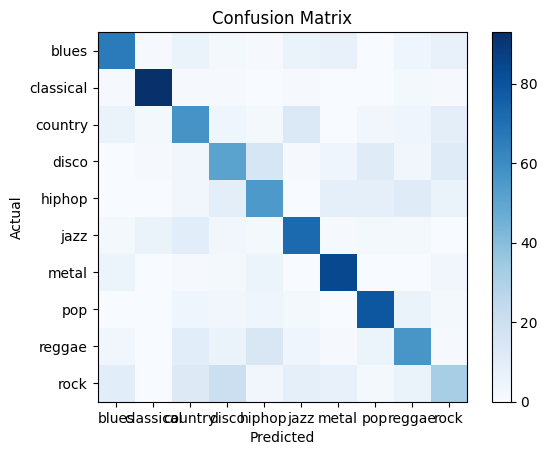

In [80]:
# Create the model
model = RandomForestClassifier()

# Perform cross-validation
y_pred = cross_val_predict(model, X_scaled, y, cv=10)

# Compute and print other evaluation metrics
report = classification_report(y, y_pred)
print('Classification Report:')
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.show()